<a href="https://colab.research.google.com/github/kairamilanifitria/Thesis/blob/main/TESTING_TRY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ROUGE ##

In [13]:
pip install rouge rouge_score evaluate

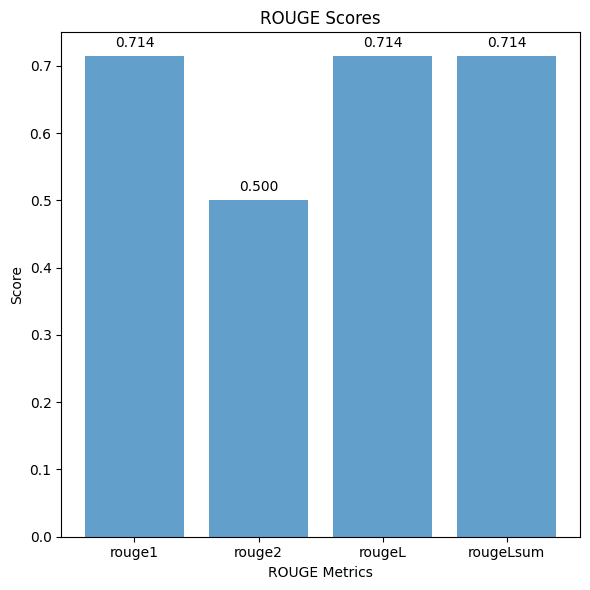

{'rouge1': 0.7142857142857143, 'rouge2': 0.5, 'rougeL': 0.7142857142857143, 'rougeLsum': 0.7142857142857143}


In [14]:
import matplotlib.pyplot as plt
import evaluate
rouge = evaluate.load("rouge")

def visualize_rouge_scores(rouge_scores):
    metrics = ['rouge1', 'rouge2', 'rougeL', 'rougeLsum']
    scores = [rouge_scores[metric] for metric in metrics]

    fig, ax = plt.subplots(figsize=(6, 6))  # Adjust the figure size
    bars = plt.bar(metrics, scores, alpha=0.7)
    plt.title('ROUGE Scores')
    plt.xlabel('ROUGE Metrics')
    plt.ylabel('Score')

    for i, score in enumerate(scores):
        plt.text(i, score + 0.01, f'{score:.3f}', ha='center', va='bottom')

    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.show()

# Example usage:
generated_text = ["This is a sample generated text."]
reference_text = ["This is a sample reference text for testing."]
rouge_scores = rouge.compute(predictions=generated_text, references=reference_text)

visualize_rouge_scores(rouge_scores)
print(rouge_scores)


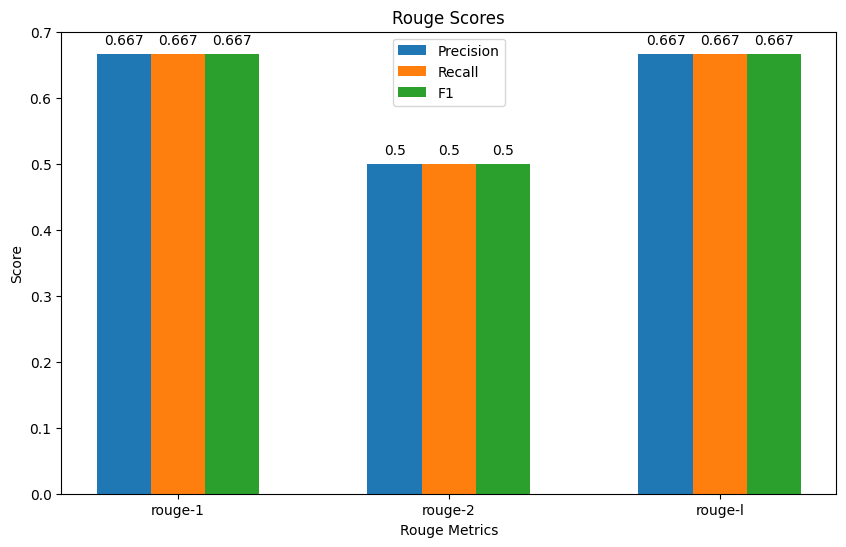

{'rouge-1': {'r': 0.6666666666666666, 'p': 0.6666666666666666, 'f': 0.6666666616666668}, 'rouge-2': {'r': 0.5, 'p': 0.5, 'f': 0.4999999950000001}, 'rouge-l': {'r': 0.6666666666666666, 'p': 0.6666666666666666, 'f': 0.6666666616666668}}


In [15]:
import matplotlib.pyplot as plt
from rouge import Rouge
rouge = Rouge()

def visualize_rouge_scores(rouge_scores):
    metrics = ['rouge-1', 'rouge-2', 'rouge-l']
    precision = [rouge_scores[metric]['p'] for metric in metrics]
    recall = [rouge_scores[metric]['r'] for metric in metrics]
    f1 = [rouge_scores[metric]['f'] for metric in metrics]

    fig, ax = plt.subplots(figsize=(10, 6))
    width = 0.2
    bar1 = ax.bar(range(len(metrics)), precision, width, label='Precision')
    bar2 = ax.bar([i + width for i in range(len(metrics))], recall, width, label='Recall')
    bar3 = ax.bar([i + 2 * width for i in range(len(metrics))], f1, width, label='F1')

    ax.set_title('Rouge Scores')
    ax.set_xlabel('Rouge Metrics')
    ax.set_ylabel('Score')
    ax.set_xticks([i + width for i in range(len(metrics))])
    ax.set_xticklabels(metrics)
    ax.legend()

    # Annotate bars with values
    for bars in [bar1, bar2, bar3]:
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 3), ha='center', va='bottom')

    plt.show()

# Example usage:
references = ["Reference text 1", "Reference text 2", "Reference text 3"]
predictions_rag = ["Generated text 1", "Generated text 2", "Generated text 3"]

rouge_scores = rouge.get_scores(references, predictions_rag, avg=True)
visualize_rouge_scores(rouge_scores)
print(rouge_scores)


## BERTScore ##

In [16]:
pip install transformers bert_score

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


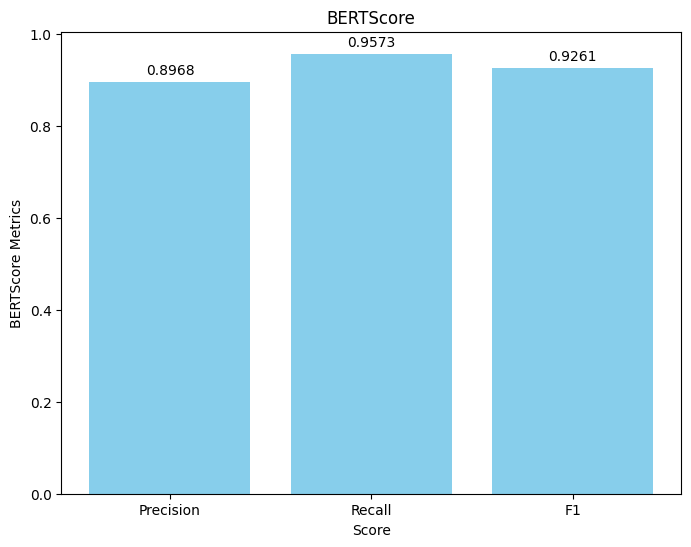

In [17]:
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertForMaskedLM, BertModel
from bert_score import BERTScorer

# Example usage:
references = ["Reference text 1", "Reference text 2", "Reference text 3"]
predictions_rag = ["Generated text 1", "Generated text 2", "Generated text 3"]

# Calculate BERTScore precision, recall, and F1-score dynamically
scorer = BERTScorer(model_type='roberta-large')
P, R, F1 = scorer.score(predictions_rag, references)

def visualize_bert_score(precision, recall, f1):
    metrics = ['Precision', 'Recall', 'F1']
    scores = [precision.mean(), recall.mean(), f1.mean()]

    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(range(len(metrics)), scores, color='skyblue')
    ax.set_title('BERTScore')
    ax.set_xlabel('Score')
    ax.set_ylabel('BERTScore Metrics')
    ax.set_xticks([i for i in range(len(metrics))])
    ax.set_xticklabels(metrics)

    # Annotate bars with values
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom')

    plt.show()

# Example usage:
visualize_bert_score(P, R, F1)


# IMPLEMENTATION #

## ROUGE ##

In [28]:
# Ground Truth
references = ["pip install flair",
              "FLAIR framework",
              "https://github.com/zalandoresearch/flair",
              "Presented FLAIR as a framework designed to facilitate experimentation with different embedding types, as well as training and distributing sequence labeling and text classification models.",
              "at least version 3.6 of Python"]

In [29]:
# Prediksi RAG
predictions_rag = ["The command for installing the FLAIR library is pip install flair",
              "The proposed solution from this paper is the FLAIR framework. It is designed to address the challenges of working with different types of word embeddings. The framework provides a unified interface for all word embeddings and allows researchers to build a single model architecture that can make use of any type of word embedding with no additional engineering effort. It also includes convenience methods for downloading NLP research datasets, model training routines, and pre-trained models. The FLAIR framework aims to simplify the process of setting up and executing experiments in natural language processing.",
              "The GitHub link for the FLAIR framework is: https://github.com/zalandoresearch/flair",
              "The purpose of the presented framework, called FLAIR, is to address the challenges of using different types of word embeddings in natural language processing (NLP) tasks. The framework aims to abstract away from specific engineering challenges and provide a unified interface for all word embeddings. It allows researchers to build a single model architecture that can make use of any type of word embedding with no additional engineering effort. The framework also includes convenience methods for downloading NLP datasets, model training and hyperparameter selection routines, and a growing list of pre-trained models. Overall, the framework is designed to facilitate experimentation with different embedding types and training and distributing sequence labeling and text classification models.",
              "The minimum version of Python required to set up FLAIR in the environment is Python 3.6."]

In [30]:
# Prediksi typeset.io
predictions_other = ["The command to install the FLAIR library is pip install flair. FLAIR is a powerful natural language processing library that provides pre-trained models and tools for various NLP tasks, including named entity recognition (NER) . By running the pip install flair command, the FLAIR library and its dependencies will be automatically downloaded and installed in the Python environment . This command requires an active internet connection to access the Python Package Index (PyPI) and retrieve the FLAIR package . Once installed, FLAIR can be imported into Python scripts or notebooks using the import flair statement, allowing users to leverage its functionalities for NLP tasks, including NER in the biomedical domain.",
                     "The proposed solution from the paper is a natural language processing (NLP) framework called FLAIR (Framework for Learning and Information Extraction). FLAIR utilizes state-of-the-art deep learning techniques, such as bidirectional LSTMs and contextual string embeddings, to achieve high-performance results in various NLP tasks, including named entity recognition (NER). The framework is designed to be user-friendly and provides pre-trained models and tools for NLP tasks. FLAIR offers compatibility with different operating systems, including Windows, macOS, and Linux, and requires a minimum Python version of 3.6 or higher. By installing the FLAIR library using the pip install flair command, users can access the functionalities of the framework and leverage its pre-trained models for NER and other NLP tasks.",
                     "The GitHub link for the FLAIR framework is https://github.com/flairNLP/flair . The FLAIR GitHub repository provides access to the source code, documentation, and examples for using the FLAIR library in natural language processing tasks . Users can clone or download the FLAIR repository from the provided GitHub link to get the latest version of the framework . The repository contains information on how to install FLAIR, as well as tutorials and examples to help users get started with using the framework for NLP tasks . Additionally, the FLAIR GitHub repository allows users to contribute to the development of the framework by submitting issues or pull requests.",
                     "The presented framework is used for natural language processing (NLP) tasks, specifically named entity recognition (NER) and other NLP tasks. The framework, called FLAIR (Framework for Learning and Information Extraction), utilizes deep learning techniques, such as bidirectional LSTMs and contextual string embeddings, to achieve high-performance results in NLP tasks. FLAIR provides pre-trained models and tools for NLP tasks, making it user-friendly and accessible for researchers and practitioners. The framework is compatible with different operating systems, including Windows, macOS, and Linux, and can be installed using the pip install flair command. The FLAIR GitHub repository (https://github.com/flairNLP/flair) contains the source code, documentation, and examples for using the FLAIR library in NLP tasks, allowing users to clone or download the repository to access the latest version of the framework. Users can contribute to the development of FLAIR by submitting issues or pull requests through the GitHub repository.",
                     "The minimum Python version required to set up FLAIR in the environment is Python 3.6 or higher. FLAIR is compatible with different operating systems, including Windows, macOS, and Linux. To install FLAIR, users can use the ""pip install flair"" command, which will automatically install the required dependencies. FLAIR provides pre-trained models and tools for natural language processing (NLP) tasks, such as named entity recognition (NER).The FLAIR GitHub repository (https://github.com/flairNLP/flair) contains the source code, documentation, and examples for using the FLAIR library in NLP tasks. Users can contribute to the development of FLAIR by submitting issues or pull requests through the GitHub repository"]

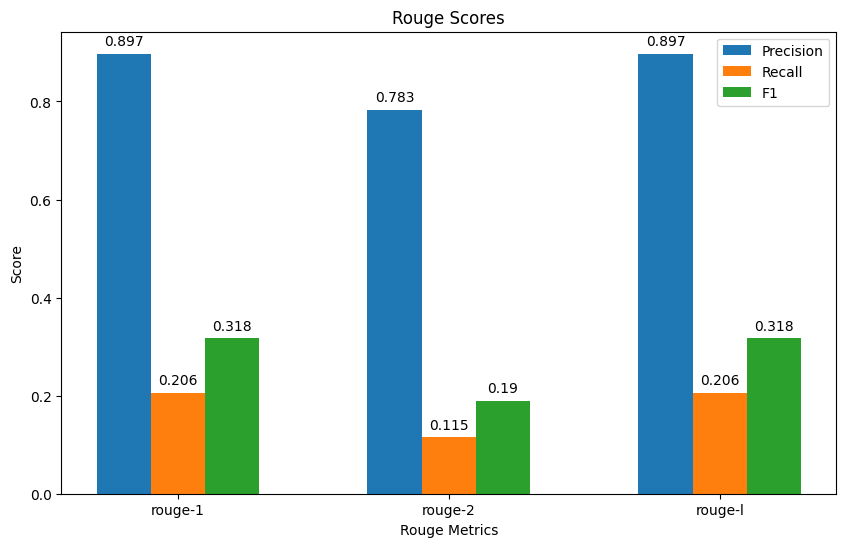

{'rouge-1': {'r': 0.20588053067827422, 'p': 0.8974025974025974, 'f': 0.31793180956024325}, 'rouge-2': {'r': 0.1151574866279536, 'p': 0.7833333333333334, 'f': 0.1895800082881936}, 'rouge-l': {'r': 0.20588053067827422, 'p': 0.8974025974025974, 'f': 0.31793180956024325}}


In [21]:
import matplotlib.pyplot as plt
from rouge import Rouge
rouge = Rouge()

def visualize_rouge_scores(rouge_scores):
    metrics = ['rouge-1', 'rouge-2', 'rouge-l']
    precision = [rouge_scores[metric]['p'] for metric in metrics]
    recall = [rouge_scores[metric]['r'] for metric in metrics]
    f1 = [rouge_scores[metric]['f'] for metric in metrics]

    fig, ax = plt.subplots(figsize=(10, 6))
    width = 0.2
    bar1 = ax.bar(range(len(metrics)), precision, width, label='Precision')
    bar2 = ax.bar([i + width for i in range(len(metrics))], recall, width, label='Recall')
    bar3 = ax.bar([i + 2 * width for i in range(len(metrics))], f1, width, label='F1')

    ax.set_title('Rouge Scores')
    ax.set_xlabel('Rouge Metrics')
    ax.set_ylabel('Score')
    ax.set_xticks([i + width for i in range(len(metrics))])
    ax.set_xticklabels(metrics)
    ax.legend()

    # Annotate bars with values
    for bars in [bar1, bar2, bar3]:
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 3), ha='center', va='bottom')

    plt.show()

rouge_scores = rouge.get_scores(references, predictions_rag, avg=True)
visualize_rouge_scores(rouge_scores)
print(rouge_scores)

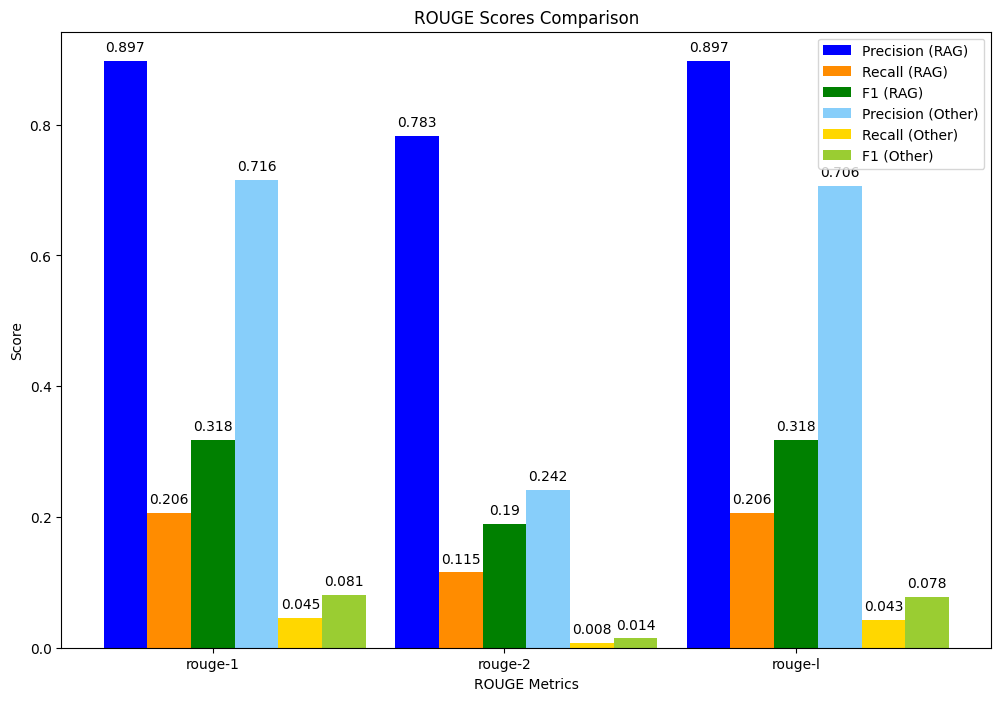

In [68]:
import matplotlib.pyplot as plt
from rouge import Rouge

rouge = Rouge()

def visualize_rouge_scores(rouge_scores_rag, rouge_scores_other):
    metrics = ['rouge-1', 'rouge-2', 'rouge-l']

    precision_rag = [rouge_scores_rag[metric]['p'] for metric in metrics]
    recall_rag = [rouge_scores_rag[metric]['r'] for metric in metrics]
    f1_rag = [rouge_scores_rag[metric]['f'] for metric in metrics]

    precision_other = [rouge_scores_other[metric]['p'] for metric in metrics]
    recall_other = [rouge_scores_other[metric]['r'] for metric in metrics]
    f1_other = [rouge_scores_other[metric]['f'] for metric in metrics]

    fig, ax = plt.subplots(figsize=(12, 8))
    width = 0.15

    # Bars for predictions_rag
    bar1 = ax.bar(range(len(metrics)), precision_rag, width, label='Precision (RAG)', color='blue')
    bar2 = ax.bar([i + width for i in range(len(metrics))], recall_rag, width, label='Recall (RAG)', color='darkorange')
    bar3 = ax.bar([i + 2 * width for i in range(len(metrics))], f1_rag, width, label='F1 (RAG)', color='green')

    # Bars for predictions_other
    bar4 = ax.bar([i + 3 * width for i in range(len(metrics))], precision_other, width, label='Precision (Other)', color='lightskyblue')
    bar5 = ax.bar([i + 4 * width for i in range(len(metrics))], recall_other, width, label='Recall (Other)', color='gold')
    bar6 = ax.bar([i + 5 * width for i in range(len(metrics))], f1_other, width, label='F1 (Other)', color='yellowgreen')

    ax.set_title('ROUGE Scores Comparison')
    ax.set_xlabel('ROUGE Metrics')
    ax.set_ylabel('Score')
    ax.set_xticks([i + 2 * width for i in range(len(metrics))])
    ax.set_xticklabels(metrics)
    ax.legend()

    # Annotate bars with values
    for bars in [bar1, bar2, bar3, bar4, bar5, bar6]:
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 3), ha='center', va='bottom')

    plt.show()

rouge_scores_rag = rouge.get_scores(references, predictions_rag, avg=True)
rouge_scores_other = rouge.get_scores(references, predictions_other, avg=True)

visualize_rouge_scores(rouge_scores_rag, rouge_scores_other)


## BERTScore ##

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


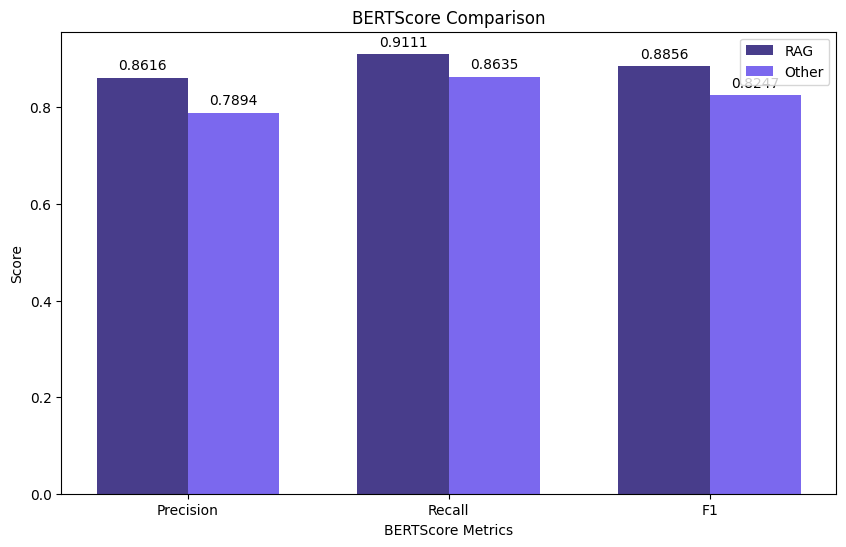

In [64]:
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertForMaskedLM, BertModel
from bert_score import BERTScorer

# Calculate BERTScore precision, recall, and F1-score for predictions_rag
scorer_rag = BERTScorer(model_type='roberta-large')
P_rag, R_rag, F1_rag = scorer_rag.score(predictions_rag, references)

# Calculate BERTScore precision, recall, and F1-score for predictions_other
scorer_other = BERTScorer(model_type='roberta-large')
P_other, R_other, F1_other = scorer_other.score(predictions_other, references)

def visualize_bert_score(precision_rag, recall_rag, f1_rag, precision_other, recall_other, f1_other):
    metrics = ['Precision', 'Recall', 'F1']

    scores_rag = [precision_rag.mean(), recall_rag.mean(), f1_rag.mean()]
    scores_other = [precision_other.mean(), recall_other.mean(), f1_other.mean()]

    fig, ax = plt.subplots(figsize=(10, 6))
    width = 0.35
    index = range(len(metrics))

    # Bars for predictions_rag
    bar1 = ax.bar(index, scores_rag, width, label='RAG', color='darkslateblue')

    # Bars for predictions_other
    bar2 = ax.bar([i + width for i in index], scores_other, width, label='Other', color='mediumslateblue')

    ax.set_title('BERTScore Comparison')
    ax.set_xlabel('BERTScore Metrics')
    ax.set_ylabel('Score')
    ax.set_xticks([i + width/2 for i in index])
    ax.set_xticklabels(metrics)
    ax.legend()

    # Annotate bars with values
    for bars in [bar1, bar2]:
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom')

    plt.show()

# Example usage:
visualize_bert_score(P_rag, R_rag, F1_rag, P_other, R_other, F1_other)
